## HW3 Malaria Dataset Visualizations

### Zhuoran Hou, zh105

Create 3 informative visualizations about malaria using Python in a Jupyter notebook, starting with the data sets at https://github.com/rfordatascience/tidytuesday/tree/master/data/2018/2018-11-13. Blog.

In [266]:
%matplotlib inline
import matplotlib.pyplot as plt  

In [267]:
import pandas as pd
import seaborn as sns 
import numpy as np

In [268]:
df0 = pd.read_csv("https://datahub.io/JohnSnowLabs/country-and-continent-codes-list/r/country-and-continent-codes-list-csv.csv")
df0

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
...,...,...,...,...,...,...
257,Africa,AF,"Zambia, Republic of",ZM,ZMB,894.0
258,Oceania,OC,Disputed Territory,XX,NaN,NaN
259,Asia,AS,Iraq-Saudi Arabia Neutral Zone,XE,NaN,NaN
260,Asia,AS,United Nations Neutral Zone,XD,NaN,NaN


In [269]:
dfc = (
    df0.iloc[:,[0,4]].
    dropna(subset=['Three_Letter_Country_Code']).
    drop_duplicates(subset=['Three_Letter_Country_Code'])
)

dfc

,Continent_Name,Three_Letter_Country_Code
0,Asia,AFG
1,Europe,ALB
2,Antarctica,ATA
3,Africa,DZA
4,Oceania,ASM
...,...,...
253,South America,VEN
254,Oceania,WLF
255,Oceania,WSM
256,Asia,YEM


In [270]:
df1_1 = (
    df1.dropna(subset=['Code']).
    merge(dfc,left_on = 'Code', right_on = 'Three_Letter_Country_Code', how = 'left' )
)
df1_1

,Entity,Code,Year,Mortality rate,Continent_Name,Three_Letter_Country_Code
0,Afghanistan,AFG,1990,6.802930,Asia,AFG
1,Afghanistan,AFG,1991,6.973494,Asia,AFG
2,Afghanistan,AFG,1992,6.989882,Asia,AFG
3,Afghanistan,AFG,1993,7.088983,Asia,AFG
4,Afghanistan,AFG,1994,7.392472,Asia,AFG
...,...,...,...,...,...,...
5260,Zimbabwe,ZWE,2012,9.751727,Africa,ZWE
5261,Zimbabwe,ZWE,2013,9.419939,Africa,ZWE
5262,Zimbabwe,ZWE,2014,9.487453,Africa,ZWE
5263,Zimbabwe,ZWE,2015,9.440046,Africa,ZWE


### 1. Malaria deaths by country for all ages across the world and time.

- Read the dataset

In [271]:
df1 = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths.csv')

In [272]:
df1 = df1.dropna(subset=['Code']) ## drop those are not countries
df1 = df1[df1['Entity'] != 'World']  ## delete whole world data
df1

,Entity,Code,Year,"Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)"
0,Afghanistan,AFG,1990,6.802930
1,Afghanistan,AFG,1991,6.973494
2,Afghanistan,AFG,1992,6.989882
3,Afghanistan,AFG,1993,7.088983
4,Afghanistan,AFG,1994,7.392472
...,...,...,...,...
6151,Zimbabwe,ZWE,2012,9.751727
6152,Zimbabwe,ZWE,2013,9.419939
6153,Zimbabwe,ZWE,2014,9.487453
6154,Zimbabwe,ZWE,2015,9.440046


- Rename the column names

In [273]:
df1.columns=['Entity', 'Code', 'Year','Mortality rate']

- Choose top ten countries with the highest mean mortality rate from 1990 to 2016

In [274]:
df1_m = ( 
    df1.groupby(by="Entity").agg('mean').
    sort_values(by='Mortality rate',ascending=False).
    iloc[:10,1:].copy()
)

In [275]:
df1_m = df1_m.reset_index().copy()
df1_m

,Entity,Mortality rate
0,Sierra Leone,181.658950
1,Burkina Faso,169.667275
2,Uganda,147.281621
3,Equatorial Guinea,142.713265
4,Cote d'Ivoire,140.610546
5,Nigeria,135.902567
6,Niger,135.766525
7,Democratic Republic of Congo,134.571369
8,Burundi,131.296440
9,Mali,122.955185


In [276]:
df1_m['Entity'][7] = "DR Congo"
df1_m

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Entity,Mortality rate
0,Sierra Leone,181.658950
1,Burkina Faso,169.667275
2,Uganda,147.281621
3,Equatorial Guinea,142.713265
4,Cote d'Ivoire,140.610546
5,Nigeria,135.902567
6,Niger,135.766525
7,DR Congo,134.571369
8,Burundi,131.296440
9,Mali,122.955185


- Plot the bar plot

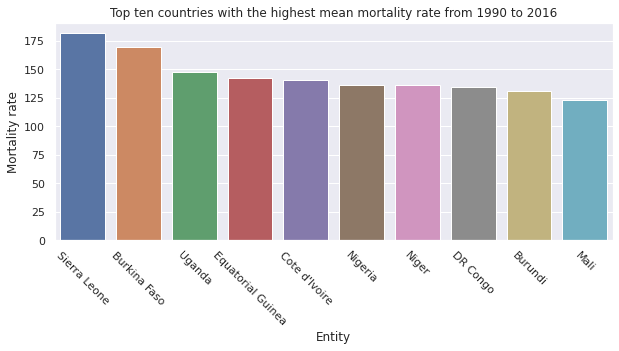

In [277]:
fig, axes = plt.subplots(1, 1, figsize=(10,4))

g1 = sns.barplot(x='Entity', y='Mortality rate', data=df1_m)
labels = df1_m['Entity']
g1.set_xticklabels(labels,rotation=-45)
plt.title('Top ten countries with the highest mean mortality rate from 1990 to 2016')

pass

- Plot the trend of mortality rate of these ten countries

In [278]:
df1_ss = df1[df1['Entity'].isin(df1_m['Entity'])].copy()
df1_ss

,Entity,Code,Year,Mortality rate
810,Burkina Faso,BFA,1990,148.890249
811,Burkina Faso,BFA,1991,154.470849
812,Burkina Faso,BFA,1992,158.051907
813,Burkina Faso,BFA,1993,162.043022
814,Burkina Faso,BFA,1994,164.068758
...,...,...,...,...
5692,Uganda,UGA,2012,69.818389
5693,Uganda,UGA,2013,54.161004
5694,Uganda,UGA,2014,48.320006
5695,Uganda,UGA,2015,50.672187


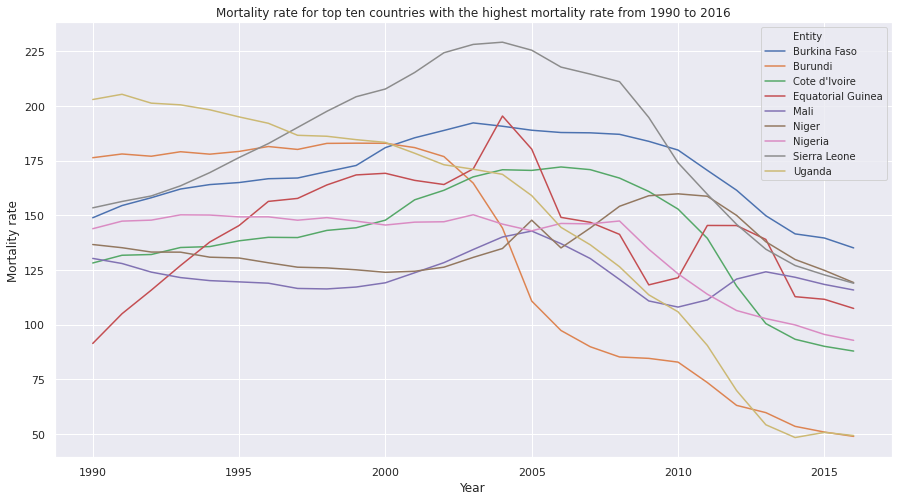

In [279]:
fig, axes = plt.subplots(1, 1, figsize=(15,8))
sns.lineplot(x='Year', y='Mortality rate',hue = 'Entity' , data=df1_ss)
plt.title('Mortality rate for top ten countries with the highest mortality rate from 1990 to 2016')
plt.legend(loc='best', fontsize=10)
pass

### 2. Malaria deaths by age across the world and time.

- Read the dataset

In [280]:
df2 = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths_age.csv',index_col = 0)
df2

,entity,code,year,age_group,deaths
1,Afghanistan,AFG,1990,Under 5,184.606435
2,Afghanistan,AFG,1991,Under 5,191.658193
3,Afghanistan,AFG,1992,Under 5,197.140197
4,Afghanistan,AFG,1993,Under 5,207.357753
5,Afghanistan,AFG,1994,Under 5,226.209363
...,...,...,...,...,...
30776,Zimbabwe,ZWE,2012,50-69,103.185111
30777,Zimbabwe,ZWE,2013,50-69,100.113293
30778,Zimbabwe,ZWE,2014,50-69,99.013890
30779,Zimbabwe,ZWE,2015,50-69,98.091738


In [281]:
df2 = df2.dropna(subset=['code']) ## drop those are not countries
df2 = df2[df2['entity'] != 'World']  ## delete whole world data
df2

,entity,code,year,age_group,deaths
1,Afghanistan,AFG,1990,Under 5,184.606435
2,Afghanistan,AFG,1991,Under 5,191.658193
3,Afghanistan,AFG,1992,Under 5,197.140197
4,Afghanistan,AFG,1993,Under 5,207.357753
5,Afghanistan,AFG,1994,Under 5,226.209363
...,...,...,...,...,...
30776,Zimbabwe,ZWE,2012,50-69,103.185111
30777,Zimbabwe,ZWE,2013,50-69,100.113293
30778,Zimbabwe,ZWE,2014,50-69,99.013890
30779,Zimbabwe,ZWE,2015,50-69,98.091738


- choose top ten countries with most death cases

In [282]:
df2_t2 = df2[df2['entity'].isin(df2_t['entity'])].copy()
df2_t2

,entity,code,year,age_group,deaths
811,Burkina Faso,BFA,1990,Under 5,18239.856090
812,Burkina Faso,BFA,1991,Under 5,19262.190962
813,Burkina Faso,BFA,1992,Under 5,20171.050076
814,Burkina Faso,BFA,1993,Under 5,21023.473688
815,Burkina Faso,BFA,1994,Under 5,21625.799178
...,...,...,...,...,...
30317,Uganda,UGA,2012,50-69,1223.126262
30318,Uganda,UGA,2013,50-69,1000.050301
30319,Uganda,UGA,2014,50-69,949.020874
30320,Uganda,UGA,2015,50-69,1083.887084


In [283]:
df2_t2.loc[df2_t2['entity'] == 'Democratic Republic of Congo','entity'] = 'DR Congo'

In [284]:
df2_t3 = df2_t2.groupby(by=["entity","age_group"]).agg('mean').iloc[:,[1]].unstack('age_group')
df2_t3.columns = ['15-49','5-14','50-69','70 or older','Under 5']
df2_t3

,15-49,5-14,50-69,70 or older,Under 5
entity,,,,,
Burkina Faso,1440.986219,2180.110659,949.531799,616.307888,27090.929143
Cameroon,1841.799877,2087.751841,1260.056940,843.155975,18920.406820
Cote d'Ivoire,2435.445658,2707.015515,1540.863000,961.537118,19893.376484
DR Congo,5865.025596,7418.616598,3738.726743,2173.788505,78082.393657
India,7467.822952,12800.418534,4570.759705,2180.711296,33569.693452
Mozambique,1768.206804,2589.157880,942.746073,646.568790,24264.110234
Niger,1049.787630,1951.445501,754.023705,476.335101,21820.324927
Nigeria,9019.184357,17961.554380,6505.248814,4558.828812,213128.814854
Tanzania,2282.382476,2561.401544,1270.799946,814.388226,24197.304098


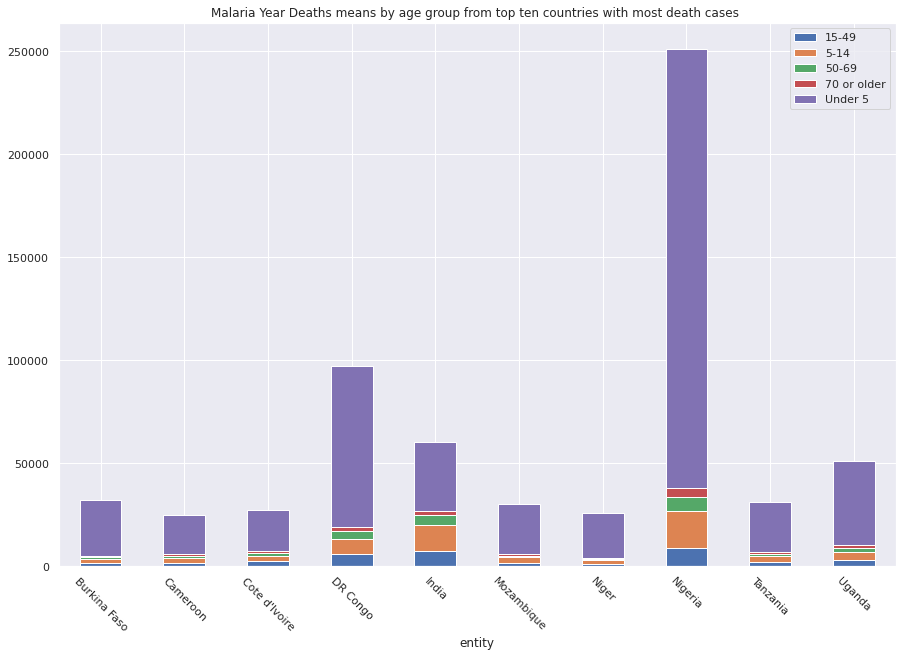

In [285]:
df2_t3.plot(kind='bar', stacked=True,figsize=(15, 10),rot = -45, title = "Malaria Year Deaths means by age group from top ten countries with most death cases ")
pass

- Choose Nigeria to see the trend of death cases across countries 

In [286]:
df2_nig = df2[df2['entity'] == 'Nigeria' ].copy()
df2_nig

,entity,code,year,age_group,deaths
3889,Nigeria,NGA,1990,Under 5,169612.233561
3890,Nigeria,NGA,1991,Under 5,177084.049314
3891,Nigeria,NGA,1992,Under 5,182532.593757
3892,Nigeria,NGA,1993,Under 5,189569.206430
3893,Nigeria,NGA,1994,Under 5,194656.088044
...,...,...,...,...,...
28535,Nigeria,NGA,2012,50-69,6362.466362
28536,Nigeria,NGA,2013,50-69,6225.805881
28537,Nigeria,NGA,2014,50-69,6309.529067
28538,Nigeria,NGA,2015,50-69,6436.740885


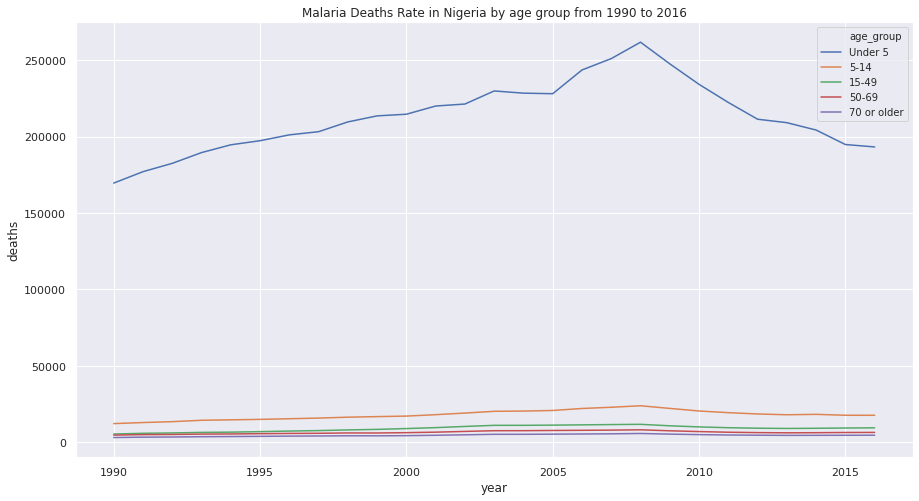

In [287]:
fig, axes = plt.subplots(1, 1, figsize=(15,8))
sns.lineplot(x='year', y='deaths',hue = 'age_group', hue_order = ['Under 5','5-14','15-49','50-69','70 or older'] , data=df2_nig)
plt.title('Malaria Deaths Rate in Nigeria by age group from 1990 to 2016')
plt.legend(loc='best', fontsize=10)
pass

### 3. Malaria incidence by country for all ages across the world across time

- Read dataset

In [288]:
df3 = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_inc.csv')

In [289]:
df3

,Entity,Code,Year,"Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)"
0,Afghanistan,AFG,2000,107.100000
1,Afghanistan,AFG,2005,46.500000
2,Afghanistan,AFG,2010,23.900000
3,Afghanistan,AFG,2015,23.600000
4,Algeria,DZA,2000,0.037746
...,...,...,...,...
503,Zambia,ZMB,2015,173.700000
504,Zimbabwe,ZWE,2000,143.200000
505,Zimbabwe,ZWE,2005,142.500000
506,Zimbabwe,ZWE,2010,129.600000


In [290]:
df3 = df3.dropna(subset=['Code']) ## drop those are not countries
df3 = df3[df3['Entity'] != 'World']  ## delete whole world data
df3

,Entity,Code,Year,"Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)"
0,Afghanistan,AFG,2000,107.100000
1,Afghanistan,AFG,2005,46.500000
2,Afghanistan,AFG,2010,23.900000
3,Afghanistan,AFG,2015,23.600000
4,Algeria,DZA,2000,0.037746
...,...,...,...,...
503,Zambia,ZMB,2015,173.700000
504,Zimbabwe,ZWE,2000,143.200000
505,Zimbabwe,ZWE,2005,142.500000
506,Zimbabwe,ZWE,2010,129.600000


In [291]:
df3.columns=['Entity', 'Code', 'Year', 'Incidence of malaria']
df3

,Entity,Code,Year,Incidence of malaria
0,Afghanistan,AFG,2000,107.100000
1,Afghanistan,AFG,2005,46.500000
2,Afghanistan,AFG,2010,23.900000
3,Afghanistan,AFG,2015,23.600000
4,Algeria,DZA,2000,0.037746
...,...,...,...,...
503,Zambia,ZMB,2015,173.700000
504,Zimbabwe,ZWE,2000,143.200000
505,Zimbabwe,ZWE,2005,142.500000
506,Zimbabwe,ZWE,2010,129.600000


- Join the table with the Continents table

In [292]:
df3_1 = df3.merge(dfc,left_on = 'Code', right_on = 'Three_Letter_Country_Code', how = 'left' )
df3_1

,Entity,Code,Year,Incidence of malaria,Continent_Name,Three_Letter_Country_Code
0,Afghanistan,AFG,2000,107.100000,Asia,AFG
1,Afghanistan,AFG,2005,46.500000,Asia,AFG
2,Afghanistan,AFG,2010,23.900000,Asia,AFG
3,Afghanistan,AFG,2015,23.600000,Asia,AFG
4,Algeria,DZA,2000,0.037746,Africa,DZA
...,...,...,...,...,...,...
391,Zambia,ZMB,2015,173.700000,Africa,ZMB
392,Zimbabwe,ZWE,2000,143.200000,Africa,ZWE
393,Zimbabwe,ZWE,2005,142.500000,Africa,ZWE
394,Zimbabwe,ZWE,2010,129.600000,Africa,ZWE


- Plot the trend of Mean Malaria Incidence for different Continents from 2000 to 2015

In [293]:
df3_2 = df3_1.groupby(by=["Continent_Name","Year"]).agg('mean').reset_index()
df3_2

,Continent_Name,Year,Incidence of malaria
0,Africa,2000,323.941229
1,Africa,2005,267.446852
2,Africa,2010,215.629814
3,Africa,2015,173.338338
4,Asia,2000,58.626923
5,Asia,2005,42.831822
6,Asia,2010,22.113422
7,Asia,2015,6.034621
8,Europe,2000,590.066667
9,Europe,2005,102.033333


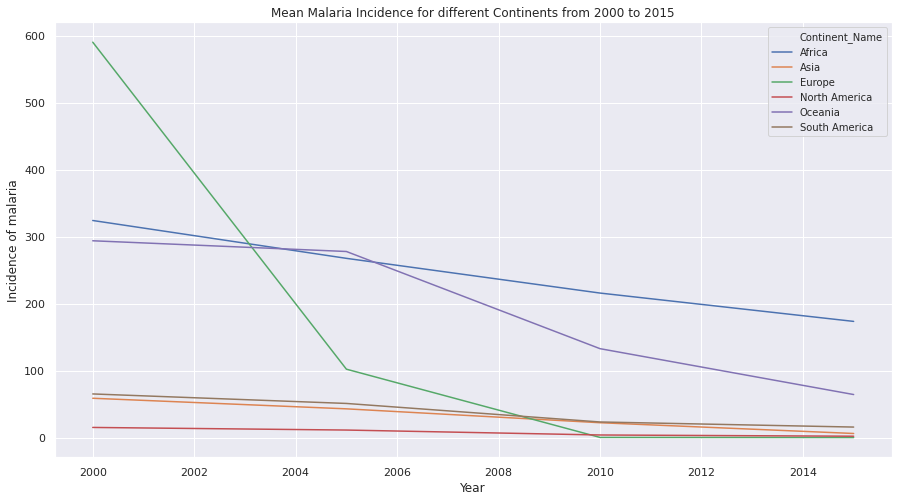

In [294]:
fig, axes = plt.subplots(1, 1, figsize=(15,8))
sns.lineplot(x='Year', y='Incidence of malaria',hue = 'Continent_Name' , data=df3_2)
plt.title('Mean Malaria Incidence for different Continents from 2000 to 2015')
plt.legend(loc='best', fontsize=10)
pass